In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-03-05 20:44:39.278842: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 20:44:39.315220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 20:44:39.315245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 20:44:39.316372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 20:44:39.322123: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 20:44:39.322933: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

In [3]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import classification_report


In [41]:
X_new = pd.read_csv('ddosx.csv')
y_new = pd.read_csv('ddosy.csv')

In [42]:
y1 = y_new
le = LabelEncoder()
y_new = le.fit_transform(y_new)

/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
y_new

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# Print the mapping of labels to digits
print("Label to digit mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

Label to digit mapping:
DdoS: 0


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = X_new.values
X_new = scaler.fit_transform(X_new)

In [46]:
X_new_reshaped = X_new.reshape((X_new.shape[0], 1, X_new.shape[1]))


In [47]:
model = load_model("bb1.keras")


In [48]:
predictions = model.predict(X_new_reshaped)

2048/2048 [==============================] - 4s 1ms/step


In [49]:
#convert to categorical
#y_new = to_categorical(y_new,3)

In [50]:
#comparison = np.argmax(predictions,axis=1) == np.argmax(y_new,axis=1)

In [51]:
#accuracy = accuracy_score(y_new, predictions)
#print("accuracy on the new dataset: {:.2f}%".format(accuracy*100))

In [54]:
y_pred = np.round(predictions)

In [55]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [56]:
print(classification_report(y_new, y_pred,zero_division='warn'))

              precision    recall  f1-score   support

         0.0       1.00      0.01      0.01     65536
         1.0       0.00      0.00      0.00         0

    accuracy                           0.01     65536
   macro avg       0.50      0.00      0.01     65536
weighted avg       1.00      0.01      0.01     65536



/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
y_true_encoded = le.fit_transform(y_new)
y_pred_labels = le.fit_transform(y_pred)

/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_new, y_pred)
confusion_mat

array([[  359, 65177],
       [    0,     0]])

In [59]:
logr_bin_df = pd.DataFrame({'Actual': y_true_encoded, 'Predicted': y_pred_labels})
print(logr_bin_df)

       Actual  Predicted
0           0          1
1           0          1
2           0          1
3           0          1
4           0          1
...       ...        ...
65531       0          1
65532       0          1
65533       0          1
65534       0          1
65535       0          1

[65536 rows x 2 columns]


In [79]:
TP = confusion_mat[0][0]
FP = confusion_mat[1][0] 
FN = confusion_mat[0][1] 
TN = confusion_mat[1][1]
TruePositiveRate = TP/(FN+TP)
FalsePositiveRate = FP/(FP+TN)
print(TruePositiveRate)
print(FalsePositiveRate)

1.0
0.10699283419817149


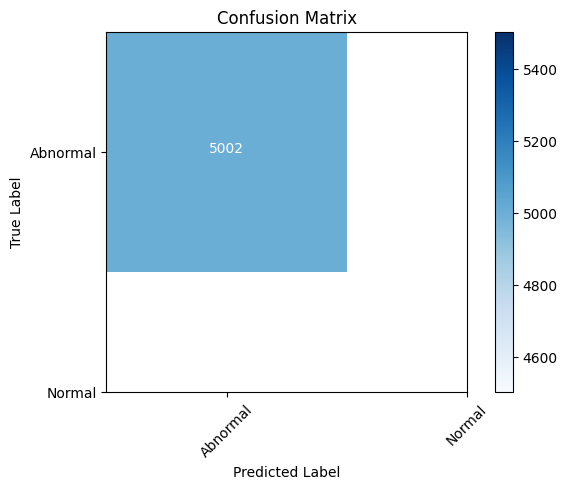

In [40]:
import itertools
def plot_confusion_matrix(conf_matrix, classes, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plot_confusion_matrix(confusion_mat, ['Abnormal', 'Normal'], "Confusion Matrix")
plt.show()